# Import necessary libraries

In [1]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Read Images and convert into numpy

In [2]:
image_dir = '/content/drive/MyDrive/Line Detection Project/Images'

image_files = os.listdir(image_dir)
image_files.pop(0)

grayscale_images = []

for file_name in image_files:
    image_path = os.path.join(image_dir, file_name)
    print(image_path)
    image = cv.imread(image_path)

    # Convert image to grayscale
    gs_img = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

    # Append the grayscale image numpy array to the list
    grayscale_images.append(gs_img)
print(grayscale_images)

/content/drive/MyDrive/Line Detection Project/Images/1.png
/content/drive/MyDrive/Line Detection Project/Images/6.png
/content/drive/MyDrive/Line Detection Project/Images/3.png
/content/drive/MyDrive/Line Detection Project/Images/2.png
/content/drive/MyDrive/Line Detection Project/Images/5.png
/content/drive/MyDrive/Line Detection Project/Images/4.png
/content/drive/MyDrive/Line Detection Project/Images/7.png
/content/drive/MyDrive/Line Detection Project/Images/8.png
[array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
    

# Plot the grayscale images from numpy

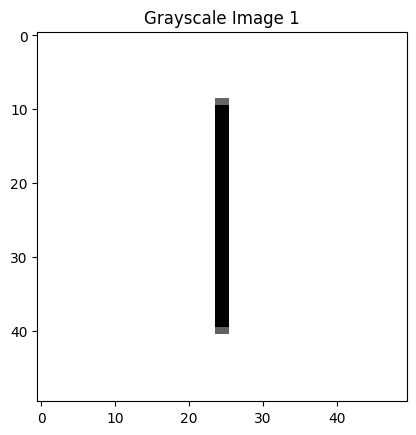

In [ ]:
for i, img in enumerate(grayscale_images):
    plt.figure()
    plt.imshow(img, cmap='gray')
    plt.title(f'Grayscale Image {i+1}')
    plt.axis('on')
    plt.show()
    break

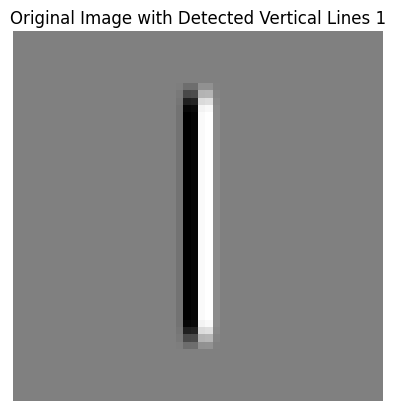

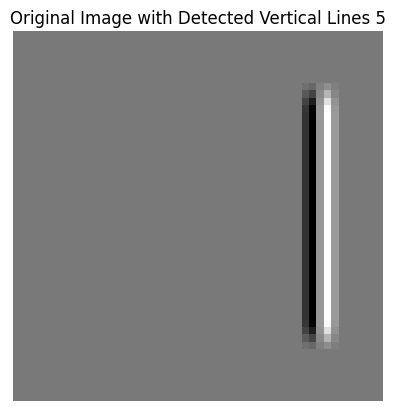

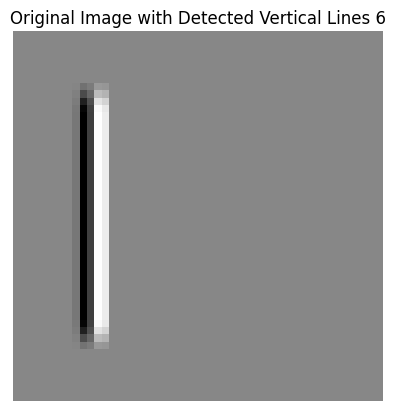

In [ ]:
# Define vertical line detection filter
vertical_filter = np.array([[-1, 0, 1],
                             [-1, 0, 1],
                             [-1, 0, 1]])

# vertical_filter = np.array([[-1, 2, 1],
#                              [-1, 2, 1],
#                              [-1, 2, 1]])


# Apply convolution operation
def convolution(image, kernel):
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape
    output_height = image_height - kernel_height + 1
    output_width = image_width - kernel_width + 1
    output = np.zeros((output_height, output_width))

    for i in range(output_height):
        for j in range(output_width):
            output[i, j] = np.sum(image[i:i+kernel_height, j:j+kernel_width] * kernel)

    return output

for i, image in enumerate(grayscale_images):

    convolved_image = convolution(image, vertical_filter)
    threshold = np.max(convolved_image)
    # print(threshold)

    if threshold > 336.0:
        overlay_image = image.copy()

        resized_convolved_image = cv.resize(convolved_image, (image.shape[1], image.shape[0]))

        # overlay_image = np.concatenate((image, resized_convolved_image), axis=1)

        plt.figure()
        plt.imshow(resized_convolved_image, cmap='gray')
        plt.title(f'Original Image with Detected Vertical Lines {i+1}')
        plt.axis('off')
        plt.show()


384.0


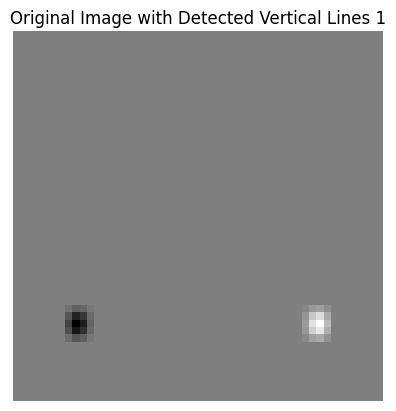

271.0
256.0
336.0
612.0


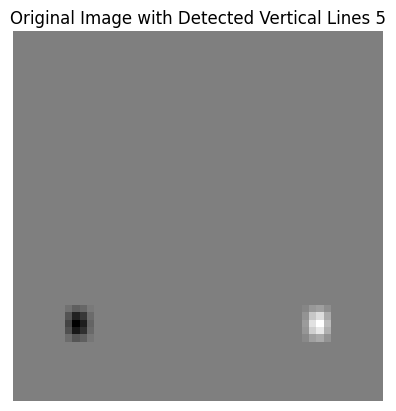

687.0


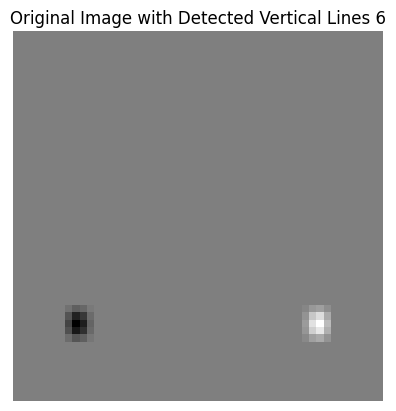

256.0
256.0


In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Define vertical line detection filter
vertical_filter = np.array([[-1, 0, 1],
                             [-1, 0, 1],
                             [-1, 0, 1]])

# Apply convolution operation
def convolution(image, kernel):
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape
    output_height = image_height - kernel_height + 1
    output_width = image_width - kernel_width + 1
    output = np.zeros((output_height, output_width))

    for i in range(output_height):
        for j in range(output_width):
            output[i, j] = np.sum(image[i:i+kernel_height, j:j+kernel_width] * kernel)

    return output

# Pooling operation (Max Pooling)
def max_pooling(image, size=(2, 2)):
    pooled_image = np.zeros((image.shape[0] // 2, image.shape[1] // 2))
    for i in range(0, image.shape[0], 2):
        for j in range(0, image.shape[1], 2):
            pooled_image[i // 2, j // 2] = np.max(image[i:i+2, j:j+2])
    return pooled_image

# ReLU activation function
def relu(image):
    return np.maximum(image, 0)

# Calculate a dynamic threshold for each image based on its characteristics
def calculate_threshold(image, kernel):
    convolved_image = convolution(image, kernel)
    pooled_image = max_pooling(convolved_image)
    relu_image = relu(pooled_image)
    return np.max(relu_image)

# Assuming grayscale_images is a list of grayscale images
for i, image in enumerate(grayscale_images):
    # Calculate threshold for detecting vertical lines in this image
    threshold = calculate_threshold(image, vertical_filter)
    print(threshold)

    # Check if significant vertical lines are detected
    if threshold > 350:  # Adjust threshold as needed
        # Resize the convolved image to match the dimensions of the original image
        convolved_image_resized = cv.resize(convolved_image, (image.shape[1], image.shape[0]))

        # Overlay the detected vertical lines on the original image
        overlay_image = np.concatenate((image, convolved_image_resized), axis=1)

        # Plot the overlaid image
        plt.figure()
        plt.imshow(overlay_image, cmap='gray')
        plt.title(f'Original Image with Detected Vertical Lines {i+1}')
        plt.axis('off')
        plt.show()